# Call Center

Quick look at the call center data set

In [2]:
import pandas as pd
import glob
import numpy as np
import math

from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)

In [5]:
path = r'C:\Users\Britt\Documents\DataAnalyse\data\half_hour.txt'
df = pd.read_csv(path, sep="\t")

In [6]:
df.head()

,date,kperiod,irregular,holiday,count,DeliverD1,DeliverD7,DeliverD14,DeliverD21,Bill1,Bill7,Bill14,Bill21,Deliver,AvgService
0,14-02-04,1,0,0,55,0,0,0,0,0,0,0,0,0,2.121667
1,14-02-04,2,0,0,63,0,0,0,0,0,0,0,0,0,1.526667
2,14-02-04,3,0,0,32,0,0,0,0,0,0,0,0,0,1.238333
3,14-02-04,4,0,0,38,0,0,0,0,0,0,0,0,0,1.111667
4,14-02-04,5,0,0,19,0,0,0,0,0,0,0,0,0,2.548333


First we see the date variable only has the data and not the time but we have 48 observation per 1 date meaning we have half-hourly data, which also corresponds with the name of the data-file. Thus we alter the date variable to also include time.

In [7]:
df.date = pd.date_range(df.date[0] , periods = len(df.date), freq='30min')

In [8]:
df.head()

,date,kperiod,irregular,holiday,count,DeliverD1,DeliverD7,DeliverD14,DeliverD21,Bill1,Bill7,Bill14,Bill21,Deliver,AvgService
0,2004-02-14 00:00:00,1,0,0,55,0,0,0,0,0,0,0,0,0,2.121667
1,2004-02-14 00:30:00,2,0,0,63,0,0,0,0,0,0,0,0,0,1.526667
2,2004-02-14 01:00:00,3,0,0,32,0,0,0,0,0,0,0,0,0,1.238333
3,2004-02-14 01:30:00,4,0,0,38,0,0,0,0,0,0,0,0,0,1.111667
4,2004-02-14 02:00:00,5,0,0,19,0,0,0,0,0,0,0,0,0,2.548333


To determine which variables are usefull we look at the READ me file which states:
    
    The zip file contains two files:

The data set contains the half-hour arrival counts between Feb 20th, 2004 and Dec 31st, 2004. 

The variables description:
date                   -- dates between Feb 14th, 2004 and Dec 31st, 2004

kperiod                -- a number between 1 and 48 indicating a specific half-hour preiod during a day (24 hours). For example, 1 corresponds to the period between midnight to 12:30pm.

irregular              -- an indicator taking the value 1 when the date corresponds to an irregular day (either a holiday
                           or for some other reason) and zero otherwise.

holiday                -- an indicator taking the value 1 when the date corresponds to an Isareli/Jewish holiday and zero 
                            otherwise.
                            
count                  -- the half-hour arrival count 

DeliverD1 - DeliverD21 -- delivery periods indicators (one for each of the four billing cycles). See Section 3.2 for 
                            further details. 
                            
Bill1 - Bill21         -- billing periods indicators (one for each of the four billing cycles). See Section 3.2 for further
                            details.
                            
Deliver                -- a global delivery period indicator which takes the value 1 when the date corresponds to at least
                            one of the delivery periods and zero otherwise
                            
AvgService             -- the average service time (minutes)

For this data set we are intrested in predicting the variable count. And the other values except avgService could be used as extra regressors.

Next we look it we have missing data

In [6]:
df.describe()

,kperiod,irregular,holiday,count,DeliverD1,DeliverD7,DeliverD14,DeliverD21,Bill1,Bill7,Bill14,Bill21,Deliver,AvgService
count,15456.000000,15456.000000,15456.000000,15456.000000,15456.000000,15456.000000,15456.000000,15456.000000,15456.000000,15456.000000,15456.000000,15456.000000,15456.000000,15456.000000
mean,24.500000,0.068323,0.055901,236.844850,0.068323,0.068323,0.062112,0.062112,0.068323,0.062112,0.062112,0.068323,0.260870,2.837855
std,13.853847,0.252307,0.229737,182.363518,0.252307,0.252307,0.241366,0.241366,0.252307,0.241366,0.241366,0.252307,0.439123,0.726409
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.750000,0.000000,0.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.496667
50%,24.500000,0.000000,0.000000,213.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.983333
75%,36.250000,0.000000,0.000000,411.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.285000
max,48.000000,1.000000,1.000000,1009.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.878330


All variable have 15456 observation thus most likely no missing data. However could be possible that the missing data is in represented as 0 or an other large value. Thus we plot the time serie.

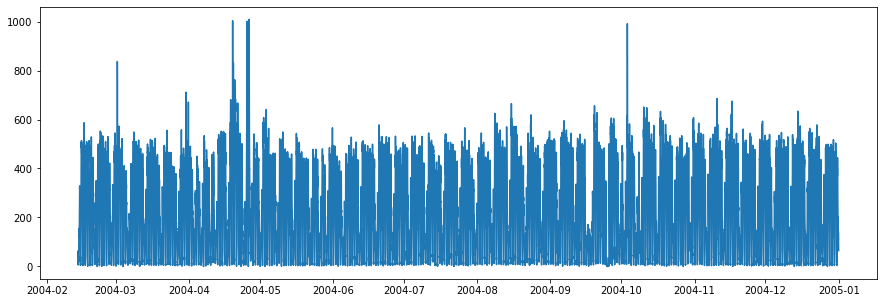

In [7]:
fig = plt.figure()

plt.plot(df['date'],df['count'])

plt.show()

From the picture we do no notice any significant missing values